# Name : Rajarshi Ray
# College : UEM Kolkata - Biotech
# Topic : Cross Validation performance using some classification models on Breast Cancer Dataset

# Kaggle Dataset Link : https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset?datasetId=3248517&sortBy=dateRun&tab=profile

##Import Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Upload Dataset and Analyse

In [2]:
df = pd.read_csv('./brca.csv')
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [3]:
# Information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [4]:
# check null

df.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [5]:
# Statistical description

df.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,285.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,427.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,569.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Shape

df.shape

(569, 32)

##Data Inference

*   Outcome : B --> Benign Stage Cancer
*   Outcome : M --> Malignant Stage Cancer



In [7]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [8]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [9]:
# See the outcome column

df.y

0      B
1      B
2      B
3      B
4      B
      ..
564    M
565    M
566    M
567    M
568    M
Name: y, Length: 569, dtype: object

In [10]:
df.y.value_counts()

B    357
M    212
Name: y, dtype: int64

In [11]:
# Outcome is categorical so we have to pre-process it

df['Outcome'] = pd.get_dummies(df.y,drop_first=True)
df.Outcome

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    1
566    1
567    1
568    1
Name: Outcome, Length: 569, dtype: uint8

In [12]:
df

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y,Outcome
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B,0
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B,0
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B,0
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B,0
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M,1
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M,1
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M,1
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M,1


## One Hot Encoding Inference

*   B (Benign) --> 0
*   M (Malignant) --> 1



In [13]:
df_final = df.drop([df.columns[0], 'y'], axis=1)

In [14]:
df_final.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Outcome
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


##Correlation Matrix and Graphical Analysis

In [15]:
data_correlation = df_final.corr()

In [16]:
data_correlation

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Outcome
x.radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
x.texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
x.perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
x.area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
x.smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
x.compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
x.concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
x.concave_pts_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
x.symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
x.fractal_dim_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


<Axes: >

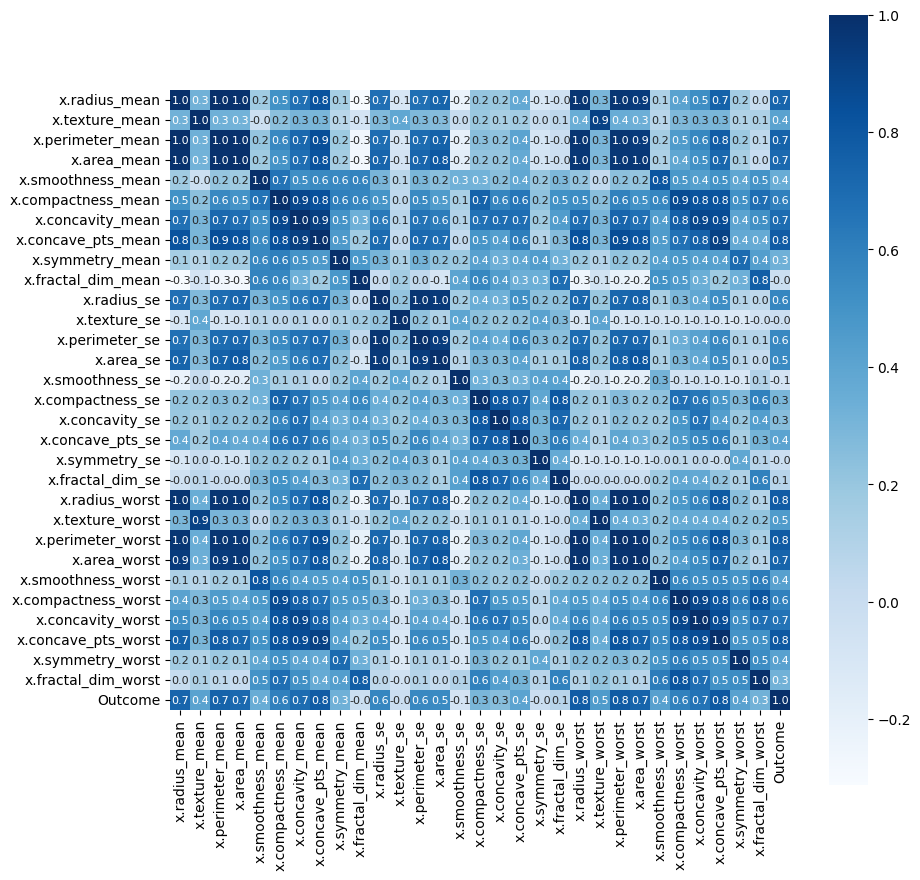

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='Outcome', ylabel='count'>

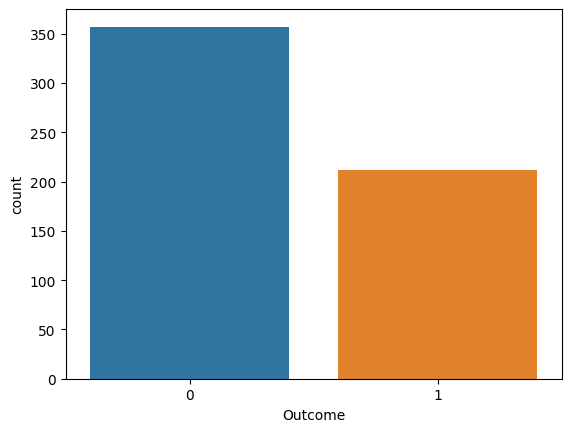

In [18]:
sns.countplot(x='Outcome',data=df_final)

## Analysing Distribution of various data on cancer outcomes

---

Box-Plot determines the interquantile range(IQR) of the data points and determines the 25 and 75 percentile values.
 We can also The "maximum" and "minimum" values, in the context you provided, are used to define the boundaries for detecting outliers based on the IQR:

Maximum: The maximum value is calculated as Q3 + 1.5 * IQR. Any data point above this value is considered a potential outlier.
Minimum: The minimum value is calculated as Q1 - 1.5 * IQR. Any data point below this value is considered a potential outlier.

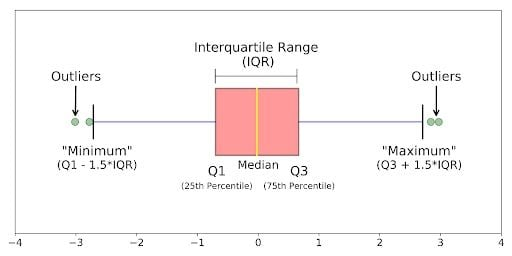

<Axes: xlabel='Outcome', ylabel='x.texture_mean'>

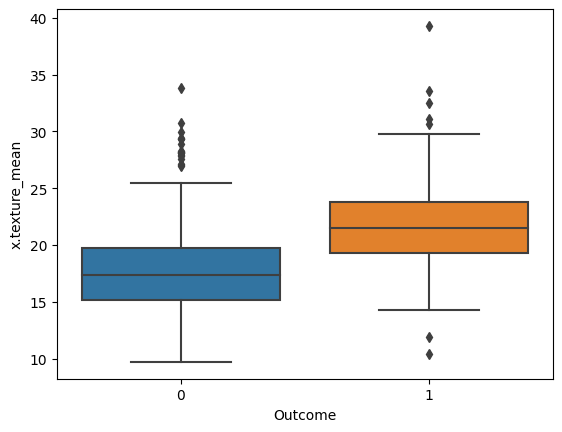

In [19]:
sns.boxplot(x='Outcome',y='x.texture_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.radius_mean'>

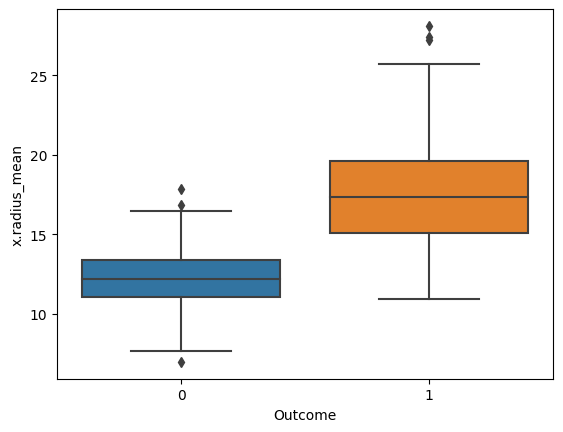

In [20]:
sns.boxplot(x='Outcome',y='x.radius_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.perimeter_mean'>

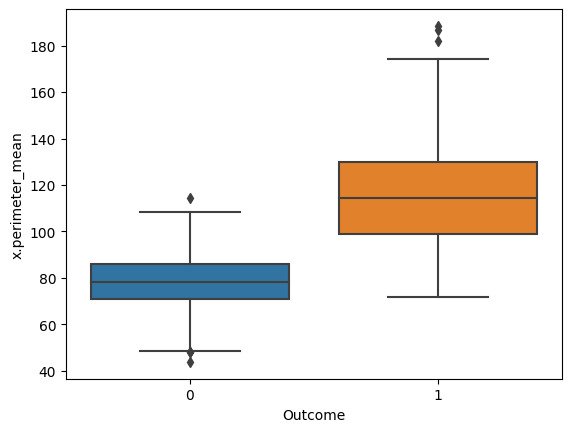

In [21]:
sns.boxplot(x='Outcome',y='x.perimeter_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.area_mean'>

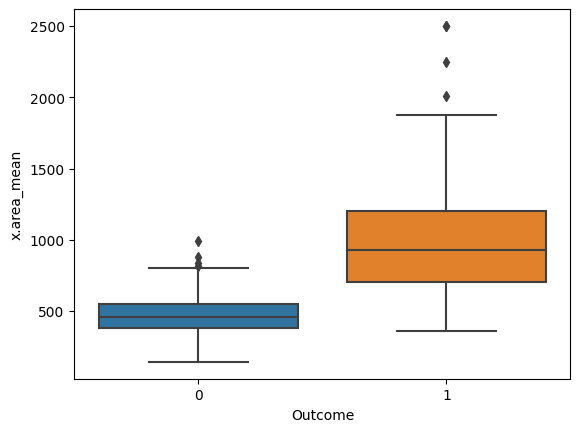

In [22]:
sns.boxplot(x='Outcome',y='x.area_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.smoothness_mean'>

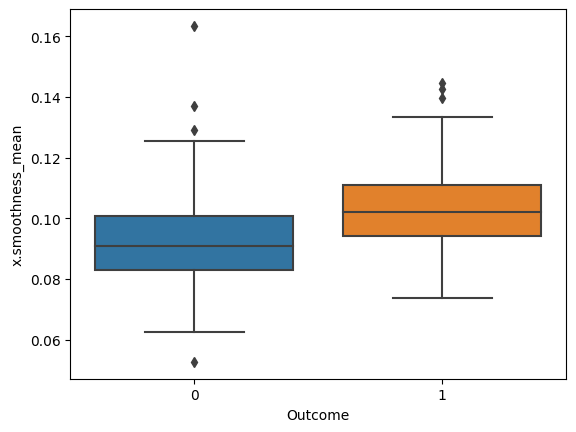

In [23]:
sns.boxplot(x='Outcome',y='x.smoothness_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.concavity_mean'>

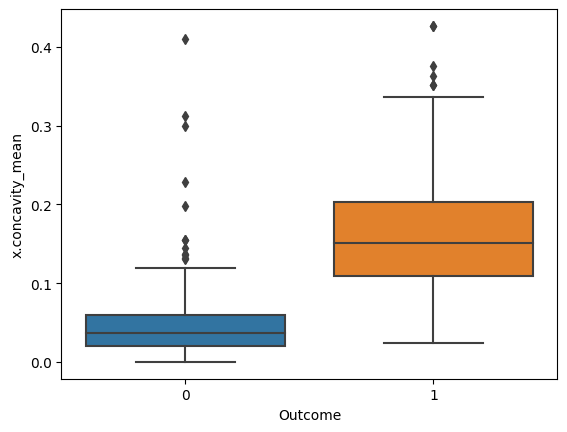

In [24]:
sns.boxplot(x='Outcome',y='x.concavity_mean',data=df_final)

<ipython-input-25-5272463d9290>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['x.concavity_mean'])


<Axes: xlabel='x.concavity_mean', ylabel='Density'>

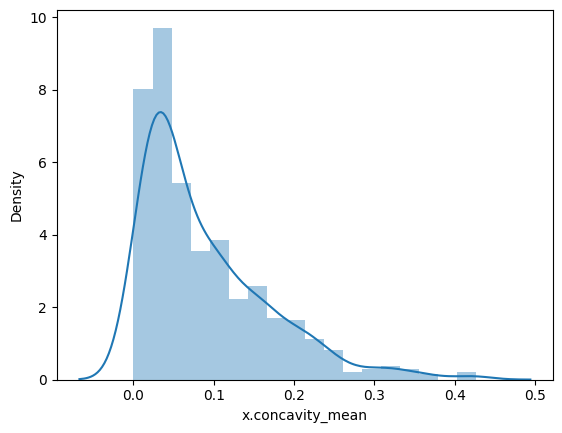

In [25]:
sns.distplot(df_final['x.concavity_mean'])

## Outliers Processing using statistics IQR
---
1. Identify the numerical variables in your dataset for which you want to remove outliers. These are typically continuous variables that you suspect may contain outliers.

2. Calculate the quartiles (Q1 and Q3) for each numerical variable using the quantile() function. Quartiles divide the data into four equal parts, with Q1 representing the 25th percentile and Q3 representing the 75th percentile.

3. Compute the IQR (interquartile range) for each variable by subtracting Q1 from Q3. The IQR measures the spread of the data within the middle 50% of the distribution.

4. Define the lower and upper bounds for outliers by subtracting 1.5 times the IQR from Q1 and adding 1.5 times the IQR to Q3, respectively. This rule of thumb defines a range within which most of the data points are expected to fall, and points outside this range are considered outliers.

5. Iterate over each numerical variable in the dataset and filter out the outliers based on the defined bounds using boolean indexing. This step creates a subset of the data that only contains the non-outlier values.

6. Apply the desired action to the outliers. In the provided code, the outliers are effectively removed from the dataset since only the non-outlier values are retained.

7. Perform any necessary data validation and quality checks after the outlier removal process. This step ensures that the data is still valid and appropriate for further analysis.

In [26]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Iterate over each column
for col in df_final.columns:
  if col != 'Outcome':
    # Calculate quartiles for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Compute IQR for the column
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective bound values
    df_final.loc[df[col] < lower_bound, col] = lower_bound
    df_final.loc[df[col] > upper_bound, col] = upper_bound


    # Print the bounds for the column
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("--------------------")


Column: x.radius_mean
Lower Bound: 5.579999999999999
Upper Bound: 21.9
--------------------
Column: x.texture_mean
Lower Bound: 7.725000000000003
Upper Bound: 30.244999999999997
--------------------
Column: x.perimeter_mean
Lower Bound: 31.775000000000013
Upper Bound: 147.49499999999998
--------------------
Column: x.area_mean
Lower Bound: -123.30000000000001
Upper Bound: 1326.3000000000002
--------------------
Column: x.smoothness_mean
Lower Bound: 0.057975
Upper Bound: 0.133695
--------------------
Column: x.compactness_mean
Lower Bound: -0.03329999999999997
Upper Bound: 0.22861999999999996
--------------------
Column: x.concavity_mean
Lower Bound: -0.12215000000000001
Upper Bound: 0.28241000000000005
--------------------
Column: x.concave_pts_mean
Lower Bound: -0.060224999999999994
Upper Bound: 0.15453499999999998
--------------------
Column: x.symmetry_mean
Lower Bound: 0.11119999999999995
Upper Bound: 0.24640000000000006
--------------------
Column: x.fractal_dim_mean
Lower Bound:

<Axes: xlabel='Outcome', ylabel='x.concavity_mean'>

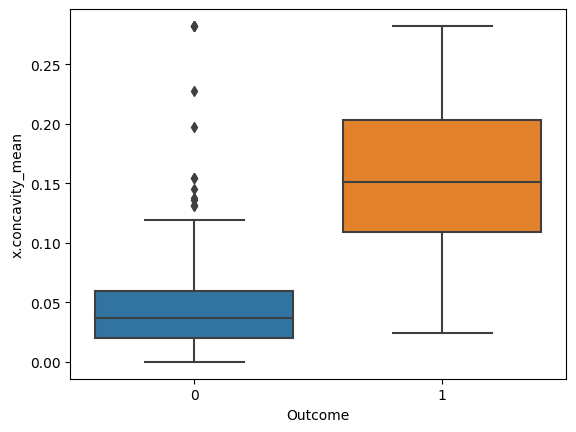

In [27]:
# Checking plots to ensure outlier removed

sns.boxplot(x='Outcome',y='x.concavity_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.smoothness_mean'>

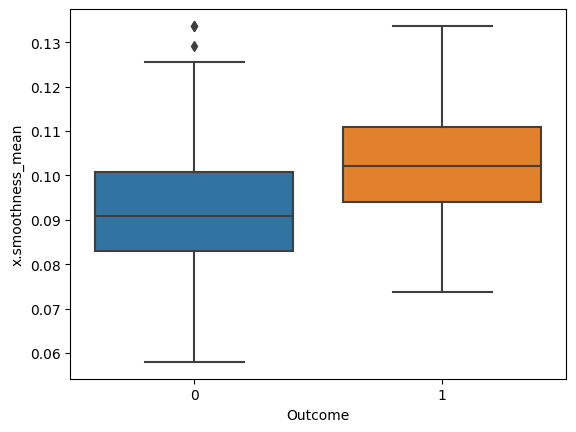

In [28]:
sns.boxplot(x='Outcome',y='x.smoothness_mean',data=df_final)

In [29]:
df_final.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Outcome
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


##Using Classification Models to perform model building to determine breast cancer data

In [30]:
# importing models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [32]:
# Making X and y

X=df_final.drop(columns='Outcome',axis=1)
y=df_final['Outcome']

In [33]:
X

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.20,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.50,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.90,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.90,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.20,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1326.3,0.10990,0.22360,0.28241,0.147400,0.2149,0.06879,...,24.290,29.41,179.10,1819.00,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,21.560,22.39,142.00,1326.3,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    1
566    1
567    1
568    1
Name: Outcome, Length: 569, dtype: uint8

In [35]:
# Initially using train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify = y, random_state=2)

In [37]:
# Dimension of X

print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


In [39]:
# Dimension of y

print(y.shape,y_train.shape,y_test.shape)

(569,) (426,) (143,)


In [40]:
# Using multiple classification models for checking the perfect model

models_classification = [LogisticRegression(max_iter=700), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [59]:
# Declaring some values to get the most effective model from list

max_score = []
best_model = None
best_score = 0.0

# Looping through all models to perform prediction

for model in models_classification:

  model.fit(X_train,y_train)

  predict_data = model.predict(X_test)

  accuracy_level = accuracy_score(y_test,predict_data)

  max_score.append(round(accuracy_level,3))
  if accuracy_level > best_score:
      best_model = model
      best_score = accuracy_level

  print(f"Model used for classification is --> {model} & the accuracy score is --> {round(accuracy_level*100,2)}%")
  print("------------------------")

# Finalising the perfect model

print()
print(f"Model with the highest score --> {best_model}")
print(f"Highest score --> {round(best_score*100,2)}%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model used for classification is --> LogisticRegression(max_iter=700) & the accuracy score is --> 92.31%
------------------------
Model used for classification is --> SVC(kernel='linear') & the accuracy score is --> 93.01%
------------------------
Model used for classification is --> KNeighborsClassifier() & the accuracy score is --> 93.71%
------------------------
Model used for classification is --> RandomForestClassifier() & the accuracy score is --> 93.71%
------------------------

Model with the highest score --> KNeighborsClassifier()
Highest score --> 93.71%


### Performing Cross Validation

In [61]:
# Performin CV on SVM for testing
# Uses various variations of splitting number of cv times to give all combinations of accuracies

svm_cv = cross_val_score(SVC(kernel='linear'),X,y,cv=6)
print(svm_cv)

[0.97894737 0.90526316 0.96842105 0.98947368 0.93684211 0.9787234 ]


In [65]:
# Performing various functions on CV score list

mean_score_cv = sum(svm_cv)/len(svm_cv)
max_score_cv = max(svm_cv)

print(f"Mean score of CV --> {round(mean_score_cv*100,2)}%")
print(f"Max score of CV --> {round(max_score_cv*100,2)}%")

Mean score of CV --> 95.96%
Max score of CV --> 98.95%


In [68]:
# Performing CV for all models

models_classification_cv = [LogisticRegression(max_iter=700), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [70]:
for model in models_classification_cv:

  cv_score_models = cross_val_score(model,X,y,cv=6)

  mean_score_models = sum(cv_score_models)/len(cv_score_models)
  max_score_models = max(cv_score_models)


  print(f"Model used --> {model} & CV scores --> {cv_score_models}")
  print(f"Model used --> {model} & mean CV score --> {round(mean_score_models*100,2)}%")
  print("-----------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model used --> LogisticRegression(max_iter=700) & CV scores --> [0.95789474 0.91578947 0.95789474 0.96842105 0.94736842 0.96808511]
Model used --> LogisticRegression(max_iter=700) & mean CV score --> 95.26%
-----------------------------------
Model used --> SVC(kernel='linear') & CV scores --> [0.97894737 0.90526316 0.96842105 0.98947368 0.93684211 0.9787234 ]
Model used --> SVC(kernel='linear') & mean CV score --> 95.96%
-----------------------------------
Model used --> KNeighborsClassifier() & CV scores --> [0.92631579 0.89473684 0.94736842 0.92631579 0.92631579 0.93617021]
Model used --> KNeighborsClassifier() & mean CV score --> 92.62%
-----------------------------------
Model used --> RandomForestClassifier() & CV scores --> [0.96842105 0.91578947 0.96842105 0.97894737 0.94736842 0.9787234 ]
Model used --> RandomForestClassifier() & mean CV score --> 95.96%
-----------------------------------
